In [3]:
import numpy as np
import numpy.matlib as mat
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.io as sio

### Question 1

#### a)

<img src="q1a.jpg" />

#### b, c & d)

<img src="q1bcd.jpeg" />

### Question 2

<img src="q2.jpeg" />

### Question 3

#### a)

<img src="q3a.jpg" />

#### b) & c)

<img src="q3bc.jpg" />

### Question 4

#### a), b), & c)

<img src="q4.jpg" />

In [69]:
V = np.matrix([[1,2],
               [1,0],
               [0,1]])

In [83]:
P = V @ la.inv(V.T @ V) @ V.T

In [88]:
P

matrix([[ 0.83333333,  0.16666667,  0.33333333],
        [ 0.16666667,  0.83333333, -0.33333333],
        [ 0.33333333, -0.33333333,  0.33333333]])

In [87]:
la.matrix_rank(P)

2

### Question 5

#### a)

In [4]:
matlab_data_file = sio.loadmat ('fisheriris.mat')
meas = matlab_data_file['meas']
species = matlab_data_file['species']

In [5]:
meas.shape

(150, 4)

In [6]:
species.shape

(150, 1)

In [7]:
y = np.matrix([-1.] * 50 + [0.] * 50 + [1.] * 50).T

Since we have three categories, we cannot simply take the sign of the resulting y_hat and make a prediction. However, we can assign labels of -1, 0, and +1 to each category. Then, we can map the [-0.5, 0.5] interval to 0. y_hat that is below this interval would map to -1 and if it is above the interval we would can the label +1.

Least squares problem:

In [429]:
w = la.inv(meas.T @ meas) @ meas.T @ y
print(w)

[[-0.23148432]
 [-0.11212939]
 [ 0.2451066 ]
 [ 0.65082072]]


In [430]:
def map_bins(x):
    if x < -.5:
        return -1
    elif x <= .5:
        return 0
    return 1

results = meas @ w
preds = np.apply_along_axis(map_bins, 1, results)

error rate is:

In [440]:
error_rate = (preds != np.array(y.T)[0]).sum() / len(y)
print(error_rate)

0.02666666666666667


#### b)

In [530]:
def compute_test_error(x, y, iterations, train_size):
    errors = np.zeros(iterations)
    for i in range(iterations):
        train_i = np.concatenate([
            np.random.choice(range(50), train_size, replace=False),
            np.random.choice(range(50, 100), train_size, replace=False),
            np.random.choice(range(100, 150), train_size, replace=False)
        ]
        train_x = x[train_i]
        train_y = y[train_i]

        test_i = np.array(list(set(range(150))- set(train_i)))

        test_x = x[test_i]
        test_y = y[test_i]

        w = la.inv(train_x.T @ train_x) @ train_x.T @ train_y
        results = test_x @ w
        errors[i] = (np.apply_along_axis(map_bins, 1, results) != 
                     np.array(test_y)[:, 0]).sum() / (150 - train_size * 3)
    return errors.mean()

Average test error:

In [531]:
compute_test_error(meas, y, iterations=1000, train_size=40)

0.03206666666666666

#### c)

In [547]:
train_sizes = np.array(range(2, 50))
errors = np.zeros(48)
for i in range(48):
    errors[i] = compute_test_error(
        meas, y, 100, train_sizes[i]
    )

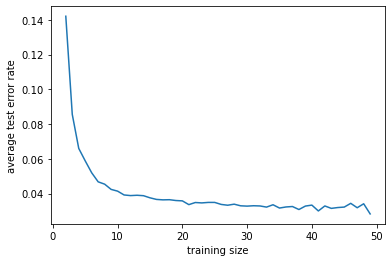

In [552]:
plt.plot(train_sizes, errors)
plt.xlabel('training size')
plt.ylabel('average test error rate');

#### d)

Error rate is almost two times higher than classifier with four measurements:

In [559]:
compute_test_error(meas[:, :3], y, 1000, 40)

0.0578

In [560]:
train_sizes = np.array(range(2, 50))
errors = np.zeros(48)
for i in range(48):
    errors[i] = compute_test_error(
        meas[:, :3], y, 100, train_sizes[i]
    )

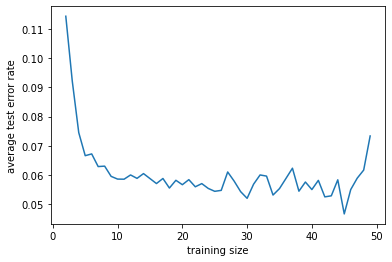

In [561]:
plt.plot(train_sizes, errors)
plt.xlabel('training size')
plt.ylabel('average test error rate');

### Question 6

#### a)

In [108]:
N = 200
p = 1

In [150]:
w = np.reshape(np.matrix(np.linspace(-12, 12, N)), (p, N))
def func(w):
    return (w ** 2) * np.cos(w) - w

In [151]:
f = np.apply_along_axis(func, 0, w).T

In [152]:
f.shape

(200, 1)

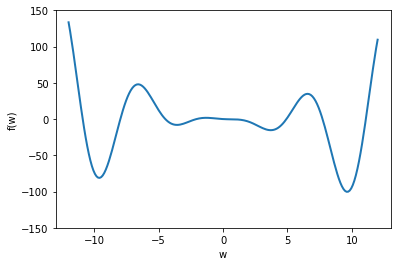

In [237]:
plt . plot (w.T, f, linewidth =2)
plt . xlabel ('w')
plt . ylabel ('f(w)')
plt . xlim ([-13,13])
plt . ylim ([-150, 150])
plt . show ()

w that minimizes the function:

In [283]:
w[0, f.argmin()]

9.587939698492463

First gradient

In [213]:
w_1 = np.random.choice(np.linspace(-12, 12, 200))
print(f'w_1: {w_1}')
f_1 = func(w_1)
print(f'f_1: {f_1}')

w_1: -3.557788944723619
f_1: -8.019513728441966


In [244]:
def gradf(w):
    return np.matrix(-w ** 2* np.sin(w) + 2 * w * np.cos(w) - 1)

In [227]:
gradf_1 = gradf(w_1)
tangent_1 = f_1 + gradf_1 @ (w - w_1)

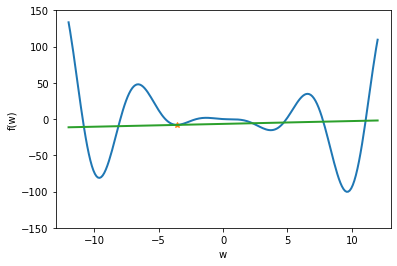

In [236]:
plt . plot (w.T, f, w_1,f_1,'*',w.T,tangent_1.T,linewidth =2)
plt . xlabel ('w')
plt . ylabel ('f(w)')
plt . xlim ([-13,13])
plt . ylim ([-150, 150])
plt . show ()

first step:

In [238]:
tau = 0.2
w_2 = w_1 - tau * gradf_1

f_2 = func(w_2)

gradf_2 = gradf(w_2)

tangent_2 = f_2 + gradf_2@(w - w_2)

Text(0, 0.5, 'f(w)')

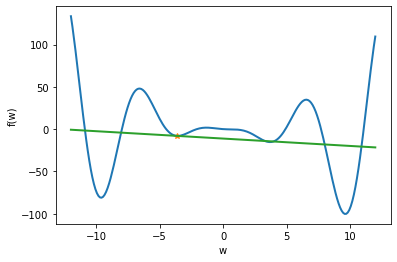

In [239]:
plt . plot (w.T, f, w_2,f_2,'*',w.T,tangent_2.T,linewidth =2)
plt . xlabel ('w')
plt . ylabel ('f(w)')

In [259]:
def gradient_descent(max_iter, tau, w_1):
    max_iter = 5
    w_hat = np.matrix(np.zeros((max_iter+1,1)))
    f_hat = np.matrix(np.zeros((max_iter+1,1)))
    w_hat[0] = w_1
    f_hat[0] = func(w_hat[0])

    for k in range(max_iter):
        gradf_k = gradf(w_hat[k])
        w_hat[k+1] = w_hat[k] - tau*gradf_k
        f_hat[k+1] = func(w_hat[k+1])


    plt . plot (w.T, f, w_hat,f_hat,'-*',linewidth =2)
    plt . xlabel ('w')
    plt . ylabel ('f(w)')
    plt . xlim ([-13,13])
    plt . ylim ([-150, 150])
    plt . show ()

Starting at w = 11

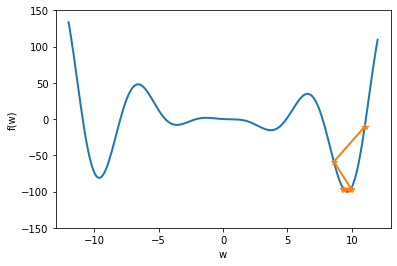

In [277]:
gradient_descent(max_iter=5, tau=.02, w_1=11)

Starting at w = 6

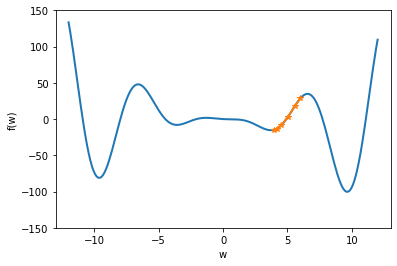

In [279]:
gradient_descent(max_iter=5, tau=.02, w_1=6)

Starting at w = -6

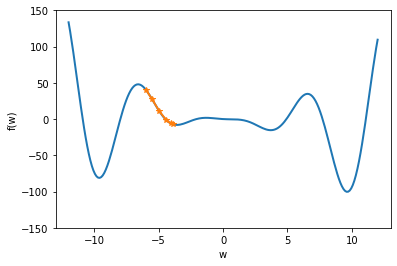

In [281]:
gradient_descent(max_iter=5, tau=.02, w_1=-6)

Large Step Size

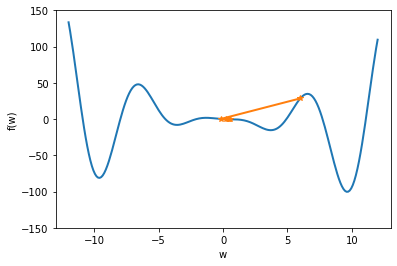

In [282]:
gradient_descent(max_iter=5, tau=.3, w_1=6)

The method does not always find the best w because the function is not convex and has multiple local minima. Based on the step size and the initial guess of w, it lands on different minima. Gradient descent moves our guess to the direction of the slope proportional to the step size, thus, for functions with multiple minima it can land on different points where slope is nearly 0. 

#### b)

In [320]:
n = 200
x = np.linspace(-1,1,n)
y = np.matrix(np.cos(3*x)).T
X = np.matrix([x**0, x**1, x**2, x**3, x**4, x**5]).T
alt_w_hat = la.inv(X.T@X)@X.T@y
tau = 2.8e-3
max_iter = 5000

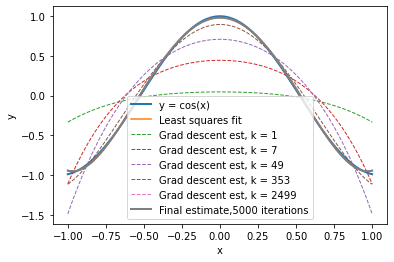

In [331]:
w_hat = np.matrix(np.zeros((6,max_iter+1)))
w_hat[:,0] = np.zeros([6,1])
plt.plot(x,y,linewidth =2,label="y = cos(x)")
plt.plot(x,X@alt_w_hat,label="Least squares fit")
plt . xlabel ("x")
plt . ylabel ("y")
for k in range(max_iter):
    gradf = 2*X.T@(X@w_hat[:, k]-y)
    w_hat[:, k+1] = w_hat[:, k] - tau * gradf
    
ktype = np.logspace(0,np.log10(max_iter/2),5,base=10).astype(int)
for k in ktype:
    plt.plot(x,X@w_hat[:,k],"--",linewidth=1,label=f"Grad descent est, k = {k}")
    
plt.plot(x,X@w_hat[:,max_iter],"-",linewidth=2,
         label=f"Final estimate,{max_iter}"+" iterations")
plt.legend()